# Chapter 2. Vectors, Part 1

## Creating and Visualizing Vectors in NumPy

Dimentionality: $\reals^N$

$$
x = \begin{bmatrix}
   1 \\
   4 \\
   5 \\
   6
\end{bmatrix}
$$

$x$ is a 4D column vector, or $x \in \reals^4$

$$
z = \begin{bmatrix}
   1 & 4 & 5 & 6
\end{bmatrix}
$$

$z$ is a 4D row vector, or $x \in \reals^4$

Linear algebra convention is to assume that vectors are in column orientation unless otherwise specified. 

Row vectors are written as $w^T$, where the $^T$ indicates the transpose operation.

> The transpose operation transforms a column vector into a row vector.

In [1]:
import numpy as np

In [2]:
# Vectors in Python

asList  = [1,2,3] # orientationless array
asArray = np.array([1,2,3]) # 1D array
rowVec  = np.array([ [1,2,3] ]) # row
colVec  = np.array([ [1],[2],[3] ]) # column

In [3]:
# Dimensions are always listed as (rows,columns).

print(f'asList:  {np.shape(asList)}')
print(f'asArray: {asArray.shape}')
print(f'rowVec:  {rowVec.shape}')
print(f'colVec:  {colVec.shape}')

asList:  (3,)
asArray: (3,)
rowVec:  (1, 3)
colVec:  (3, 1)


## Operations on Vectors

### Adding Two Vectors

$$
\begin{bmatrix}
   4 \\
   5 \\
   6
\end{bmatrix}
+
\begin{bmatrix}
   10 \\
   20 \\
   30
\end{bmatrix}
=
\begin{bmatrix}
   14 \\
   25 \\
   36
\end{bmatrix}
$$

Vector addition is defined only for two vectors that have the same dimensionality.

**Subtracting two vectors**

$$
\begin{bmatrix}
   4 \\
   5 \\
   6
\end{bmatrix}
-
\begin{bmatrix}
   10 \\
   20 \\
   30
\end{bmatrix}
=
\begin{bmatrix}
   -6 \\
   -15 \\
   -24
\end{bmatrix}
$$


In [4]:
v = np.array([4,5,6])
w = np.array([10,20,30])
u = np.array([0,3,6,9])

In [5]:
v+w

array([14, 25, 36])

In [6]:
v-w

array([ -6, -15, -24])

In [7]:
#u+w # error! dimensions mismatched!

**Can you add a row vector to a column vector?**

$$
\begin{bmatrix}
   4 \\
   5 \\
   6
\end{bmatrix}
+
\begin{bmatrix}
   10 & 20 & 30
\end{bmatrix}
= \text{?}
$$

In [8]:
v = np.array([[4,5,6]]).T # column vector
w = np.array([[10,20,30]]) # row vector
v+w

array([[14, 24, 34],
       [15, 25, 35],
       [16, 26, 36]])

> Two vectors can be added together only if they have the same dimensionality and the same orientation.

### Geometry of Vector Addition and Subtraction

To add two vectors geometrically, place the vectors such that the tail of one vector is at the head of the other vector. 

The summed vector traverses from the tail of the first vector to the head of the second.

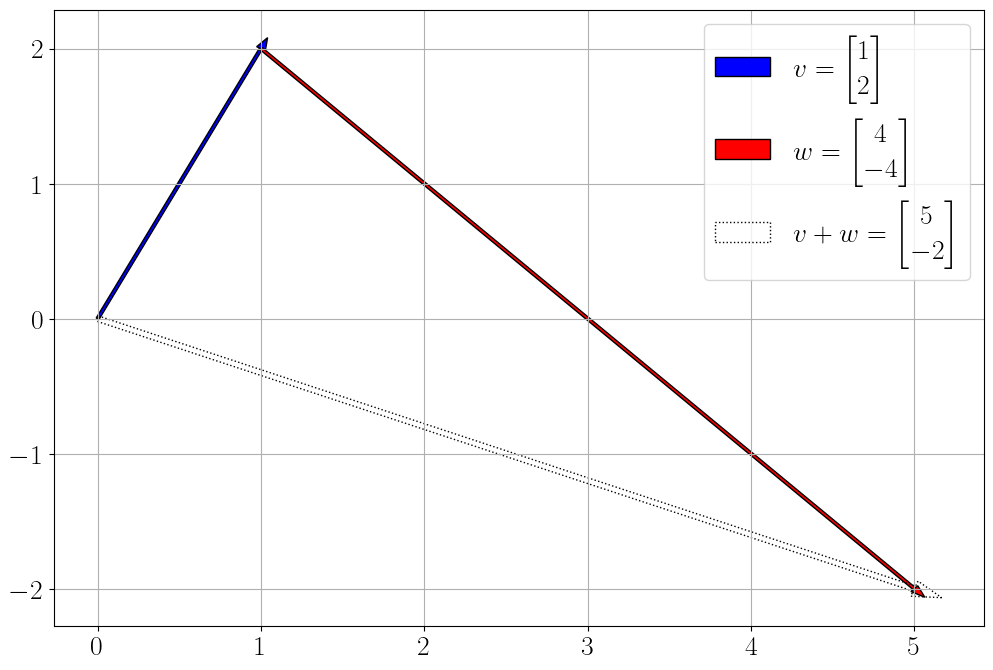

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, 1, 2, width = 0.02, fc = 'b', label = r'$v=\begin{bmatrix}1\\2\end{bmatrix}$')
plt.arrow(1, 2, 4, -4, width = 0.02, fc = 'r', label = r'$w=\begin{bmatrix}4\\-4\end{bmatrix}$')
plt.arrow(0, 0, 5, -2, width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$v+w=\begin{bmatrix}5\\-2\end{bmatrix}$')
plt.legend()
plt.grid()

Subtracting vectors geometrically is slightly different but equally straightforward: line up the two vectors such that their tails are at the same coordinate (this is easily accomplished by having both vectors in standard position); the difference vector is the line that goes from the head of the “negative” vector to the head of the “positive” vector .

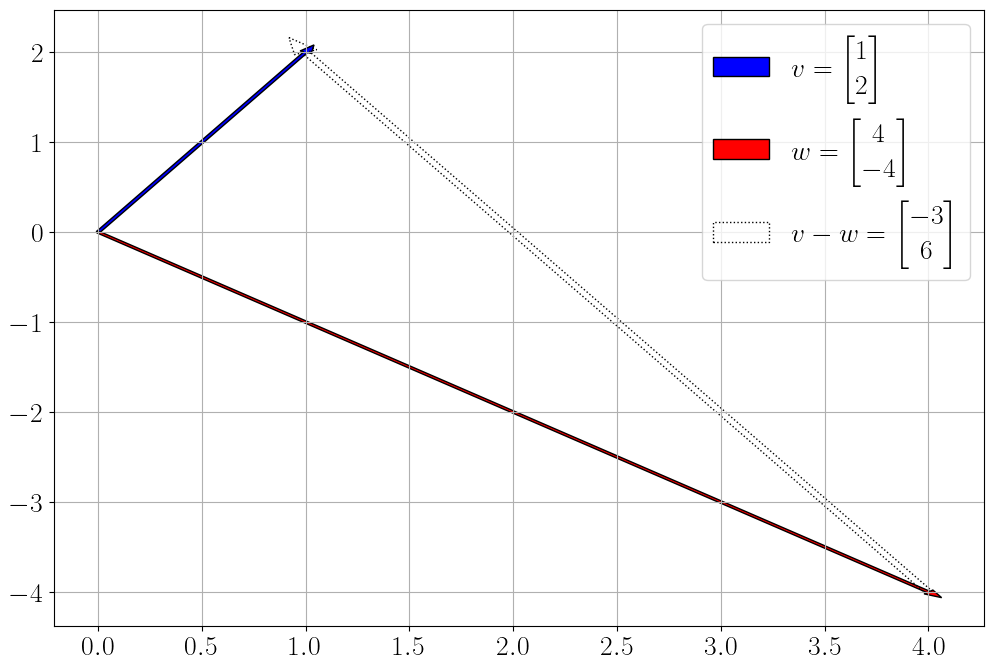

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, 1, 2, width = 0.02, fc = 'b', label = r'$v=\begin{bmatrix}1\\2\end{bmatrix}$')
plt.arrow(0, 0, 4, -4, width = 0.02, fc = 'r', label = r'$w=\begin{bmatrix}4\\-4\end{bmatrix}$')
plt.arrow(4, -4, -3, 6, width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$v-w=\begin{bmatrix}-3\\6\end{bmatrix}$')
plt.legend()
plt.grid()

### Vector-Scalar Multiplication

Adding a scalar to a vector is not formally defined in linear algebra: they are two separate kinds of mathematical objects and cannot be combined.

However, numerical processing programs like Python will allow adding scalars to vectors, and the operation is comparable to scalar-vector multiplication: the scalar is added to each vector element. 

In [11]:
s = 2
v = np.array([3,6])
s+v

array([5, 8])

**The geometry of vector-scalar multiplication**

Why are scalars called “scalars”? 
That comes from the geometric interpretation. Scalars scale vectors without changing their direction.

There are four effects of vector-scalar multiplication that depend on whether the scalar is greater than 1, between 0 and 1, exactly 0, or negative. 

Vector-scalar multiplication in combination with vector addition leads directly to vector averaging. 

### Transpose

Transpose converts column vectors into row vectors, and vice versa.

A matrix has rows and columns; therefore, each matrix element has a (row,column) index. The transpose operation simply swaps those indices.

The transpose operation:

$$
m_{i,j}^T=m{j,i}
$$

Note that transposing twice returns the vector to its original orientation:

$$
m_{i,j}^{TT}=m{i,j}
$$

### Vector Broadcasting in Python

Broadcasting is an operation that exists only in modern computer-based linear algebra; this is not a procedure you would find in a traditional linear algebra textbook.

Broadcasting essentially means to repeat an operation multiple times between one vector and each element of another vector.

$$
\begin{bmatrix}
   1 \\
   2 \\
   3
\end{bmatrix}
+
\begin{bmatrix}
   10 & 20
\end{bmatrix}
= 
\begin{bmatrix}
   11 & 21 \\
   12 & 22 \\
   13 & 23
\end{bmatrix}
$$

In [12]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]])   # row vector
v + w # addition with broadcasting

array([[11, 21],
       [12, 22],
       [13, 23]])

In [13]:
w.T + v.T

array([[11, 12, 13],
       [21, 22, 23]])

Here again you can see the importance of orientation in linear algebra operations

## Vector Magnitude and Unit Vectors

The *magnitude* of a vector—​also called the *geometric length* or the *norm—is* the distance from tail to head of a vector, and is computed using the standard Euclidean distance formula: the square root of the sum of squared vector elements.

Vector magnitude is indicated using double-vertical bars around the vector: $\begin{Vmatrix} v \end{Vmatrix}$

$$
\begin{Vmatrix} v \end{Vmatrix} = \sqrt{\sum_{i=1}^n v_i^2}
$$


In [14]:
import numpy as np

In [15]:
v = np.array([1,2,3,7,8,9])

In [16]:
len(v)  # math dimensionality

6

In [17]:
np.linalg.norm(v) # math magnitude, length, or norm

14.422205101855956

A unit vector is defined as  $\begin{Vmatrix} v \end{Vmatrix} = 1$

Creating a unit vector:

$$
\hat{v} = \frac{1}{\begin{Vmatrix} v \end{Vmatrix}} v
$$

## The Vector Dot Product

The *dot product* is a single number that provides information about the relationship between two vectors.

It is the basic computational building block from which many operations and algorithms are built, including convolution, correlation, the Fourier transform, matrix multiplication, linear feature extraction, signal filtering, and so on.

Notation: $a^\text{T} b$, or $a \cdot b$, or $\langle a, b \rangle$

Formula:

$$
\sigma = \sum_{i=1}^n a_ib_i
$$

We can tell from the formula that the dot product is valid only between two vectors of the same dimensionality.

Example:

$$
\begin{aligned}
\begin{bmatrix}
   1 & 2 & 3 & 4
\end{bmatrix}
\cdot \begin{bmatrix}
   5 & 6 & 7 & 8
\end{bmatrix}
&= 1 \times 5 + 2 \times 6 + 3 \times 7 + 4 \times 8 \\
&= 5 + 12 + 21 + 32 \\
&= 70
\end{aligned}
$$

In [18]:
v = np.array([1,2,3,4])
w = np.array([5,6,7,8])
np.dot(v,w)

70

The function `np.dot()` does not actually implement the vector dot product; it implements matrix multiplication, which is a collection of dot products. 

The dot product can be interpreted as a measure of similarity or mapping between two vectors. 

### The Dot Product Is Distributive

The dot product of a vector sum equals the sum of the vector dot products:

$$
a^\text{T}(b + c) = a^\text{T}b + a^\text{T}c
$$

In [19]:
a = np.array([ 0,1,2 ])
b = np.array([ 3,5,8 ])
c = np.array([ 13,21,34 ])

In [20]:
np.dot( a, b+c )

110

In [21]:
np.dot( a,b ) + np.dot( a,c )

110

### Geometry of the Dot Product

There is also a geometric definition of the dot product, which is the product of the magnitudes of the two vectors, scaled by the cosine of the angle between them:

$$
\alpha = cos(\theta_{v,w}) \begin{Vmatrix} v \end{Vmatrix} \begin{Vmatrix} w \end{Vmatrix}
$$

## Other Vector Multiplications

The dot product is perhaps the most important, and most frequently used, way to multiply vectors. But there are several other ways to multiply vectors:


In [22]:
import numpy as np

### Hadamard Multiplication

Each corresponding element in the two vectors is multiplied. The product is a vector of the same dimensionality as the two multiplicand:

$$
\begin{bmatrix}
   5 \\
   4 \\
   8 \\
   2
\end{bmatrix} 
\odot
\begin{bmatrix}
   1 \\
   0 \\
   .5 \\
   -1
\end{bmatrix}
=
\begin{bmatrix}
   5 \\
   0 \\
   4 \\
   -2
\end{bmatrix} 
$$

In [23]:
a = np.array([5,4,8,2])
# The below vector won't work because of dimensionality: `ValueError: operands could not be broadcast together with shapes (4,) (3,)`
#b = np.array([1,0,.5])
b = np.array([1,0,.5, -1])
a*b

array([ 5.,  0.,  4., -2.])

### Outer Product

The outer product is a way to create a matrix from a column vector and a row vector, where each row in the outer product matrix is the row vector scalar multiplied by the corresponding element in the column vector:

$$
\begin{bmatrix}
   a \\
   b \\
   c
\end{bmatrix}
\begin{bmatrix}
   d & e
\end{bmatrix}
=
\begin{bmatrix}
   ad & ae \\
   bd & be \\
   cd & ce
\end{bmatrix}
$$

The outer product is quite different from the dot product: it produces a matrix instead of a scalar, and the two vectors in an outer product can have different dimensionalities.

The outer product is indicated as $vw^\text{T}$.

> Note the subtle but important difference between notation for the dot product ($v^\text{T}w$) and the outer product ($vw^\text{T}$). 

> The outer product is similar to broadcasting, but they are not the same: broadcasting is a general coding operation that is used to expand vectors in arithmetic operations such as addition, multiplication, and division; the outer product is a specific mathematical procedure for multiplying two vectors.

In [24]:
v = np.array(
    [
        [1],
        [2],
        [3],
    ]
)
w = np.array([[4,5]])
np.outer(v, w)

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

### Cross and Triple Products

There are a few other ways to multiply vectors such as the cross product or triple product. Those methods are used in geometry and physics, but don’t come up often enough in tech-related applications to spend any time on in this book. 

## Orthogonal Vector Decomposition

To “decompose” a vector or matrix means to break up that matrix into multiple simpler pieces.

Decompositions are used to reveal information that is “hidden” in a matrix, to make the matrix easier to work with, or for data compression. 

Examples:
- We can decompose the number 42.01 into the sum of two pieces: 42 and .01. 
- We can decompose the number 42 into the product of prime numbers 2, 3, and 7 (called prime factorisation). 

> Orthogonal vector decomposition directly leads to the Gram-Schmidt procedure and QR decomposition, which is used frequently when solving inverse problems in statistics.

**Illustration**

We have two vectors $a$ and $b$ in standard position, and our goal is find the point on $a$ that is as close as possible to the head of $b$. 

Importantly, we can use vector subtraction to define the line from $b$ to $\beta a$. 

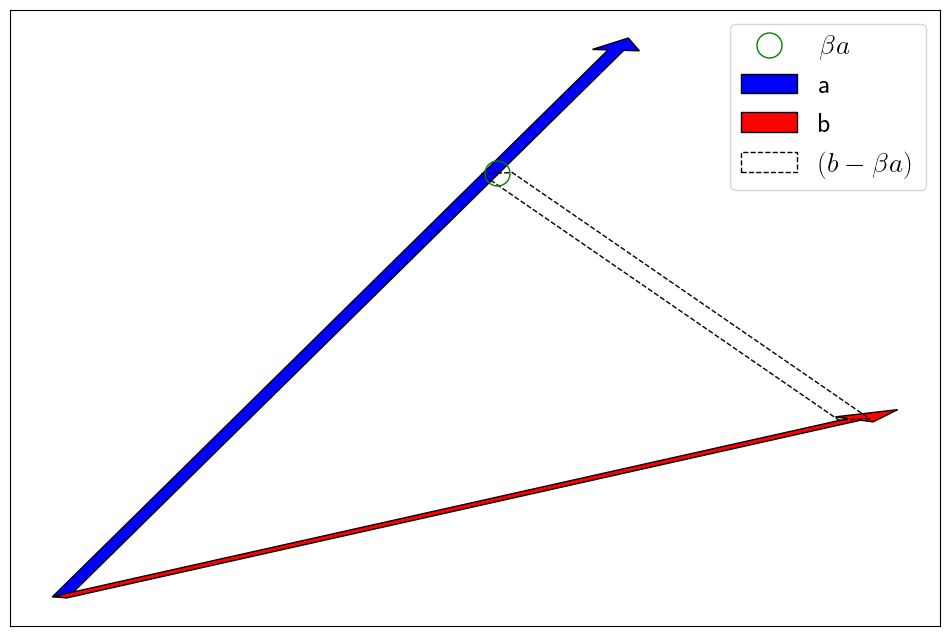

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]
plt.xticks([])
plt.yticks([])

plt.plot(0.55, 3.1, color='green', marker='o', fillstyle='none', linewidth=0, markersize=18, label=r'$\beta a$')
plt.arrow(0, 0, 0.7, 4, width = 0.02, fc = 'b', label = r'a')
plt.arrow(0, 0, 1, 1.3, width = 0.02, fc = 'r', label = r'b')
plt.arrow(1, 1.3, -0.45, 1.8, width = 0.04, fc = 'g', ls = '--', fill = False, label = r'$(b-\beta a)$', head_width=0, head_length=0)
plt.legend()
plt.grid()

The key insight that leads to the solution to this problem is that the point on $a$ that is closest to the head of $b$ is found by drawing a line from $b$ that meets $a$ at a right angle ($90\degree$). 

Putting this together, we have deduced that $(b-\beta a)$ is orthogonal to $\beta a$, which is the same thing as saying that those vectors are perpendicular. And that means that the dot product between them must be zero:

$$
a^T(b-\beta a)=0
$$

**Solving the orthogonal projection problem:**

$$
a^T(b - \beta a)=0
\\
a^T b - \beta a^T a = 0
\\
\beta a^T a = a^T b
\\
\beta = \frac{a^T b}{a^T a}
$$

The upshot is that we discovered a formula for projecting a point onto a line with minimum distance. 

This is called orthogonal projection, and it is the basis for many applications in statistics and machine learning, including the famous least squares formula for solving linear models.

We begin with two vectors, the “target vector” $t$ and the “reference vector” $r$. Our goal is to decompose the target vector into two other vectors such that (1) those two vectors sum to the target vector, and (2) one vector is orthogonal to the reference vector while the other is parallel to the reference vector.

The two vectors formed from the target vector will be called the *perpendicular component*, indicated as $t\bot_r$, and the parallel component, indicated as $t\text{\textbardbl}_r$.

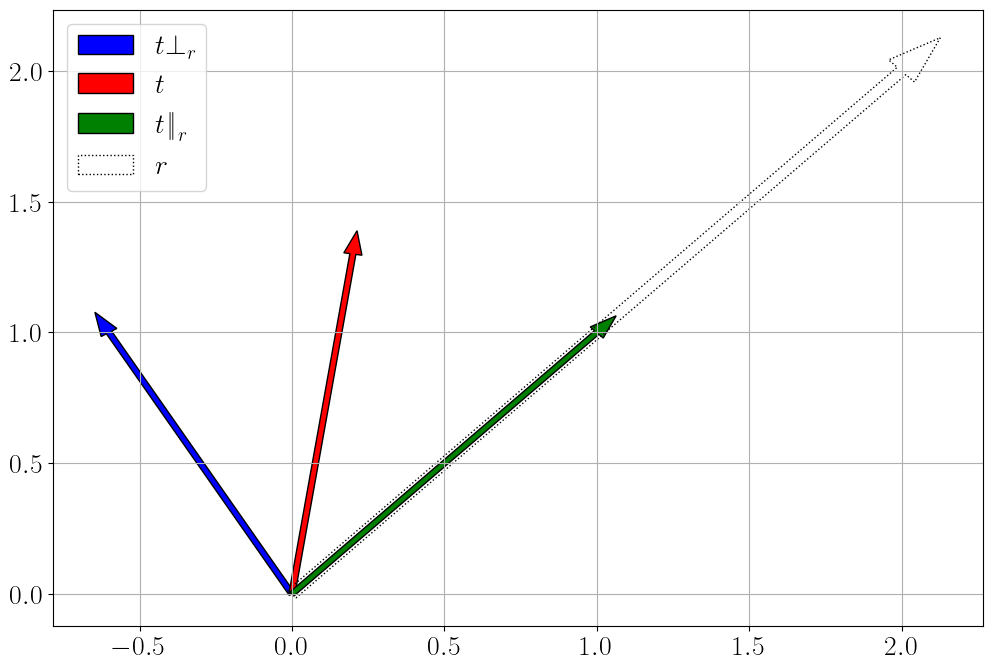

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, -0.6, 1, width = 0.02, fc = 'b', label = r'$t\bot_r$')
plt.arrow(0, 0, 0.2, 1.3, width = 0.02, fc = 'r', label = r'$t$')
plt.arrow(0, 0, 1, 1, width = 0.02, fc = 'g', label = r'$t\text{\textbardbl}_r$')
plt.arrow(0, 0, 2, 2, width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$r$')
plt.legend()
plt.grid()

We begin by defining the parallel component, where any scaled version of $r$ is obviously parallel to $r$.

We find $t\text{\textbardbl}_r$ simply by applying the orthogonal projection formula that we just discovered.

**Computing the parallel component of t with respect to r:**

$$
t\text{\textbardbl}_r = r \frac{t^T r}{r^T r}
$$

How do we find the perpendicular component? 
We already know that the two vector components must sum to the original target vector:

$$
t = t\bot_r + t\text{\textbardbl}_r
\\
t\bot_r = t - t\text{\textbardbl}_r
$$

In other words, we subtract off the parallel component from the original vector, and the residual is our perpendicular component.

To prove the perpendicular component really is orthogonal to the reference vector, you show that the dot product between the perpendicular component and the reference vector is zero:

$$
(t\bot_r)^Tr = 0
\\
(t - r\frac{t^T r}{r^T r})^T r = 0
$$

> Note again the general principle: we break apart one mathematical object into a combination of other objects.

## Exercises

In [27]:
import numpy as np

### Exercise 2-1

The online code repository is “missing” code to create Figure 2-2. (It’s not really missing—I moved it into the solution to this exercise.) So, your goal here is to write your own code to produce Figure 2-2.

In [28]:
v = np.array([1,2])
w = np.array([4,-6])

In [29]:
vPlusW = v + w
vPlusW

array([ 5, -4])

In [30]:
vMinusW = v - w
vMinusW

array([-3,  8])

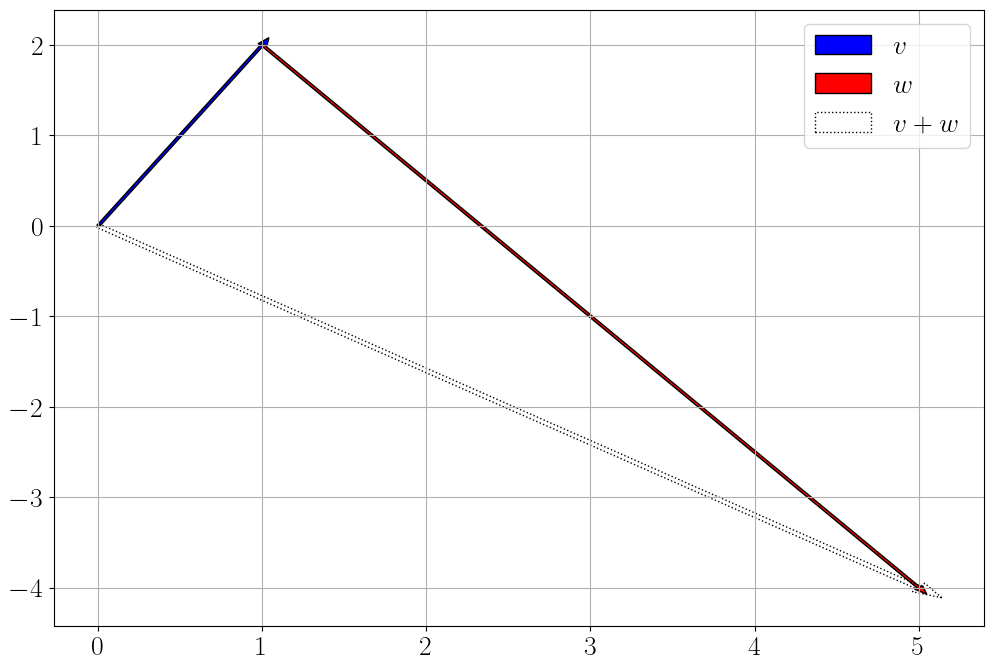

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, v[0], v[1], width = 0.02, fc = 'b', label = r'$v$')
plt.arrow(v[0], v[1], w[0], w[1], width = 0.02, fc = 'r', label = r'$w$')
plt.arrow(0, 0, vPlusW[0], vPlusW[1], width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$v+w$')
plt.legend()
plt.grid()

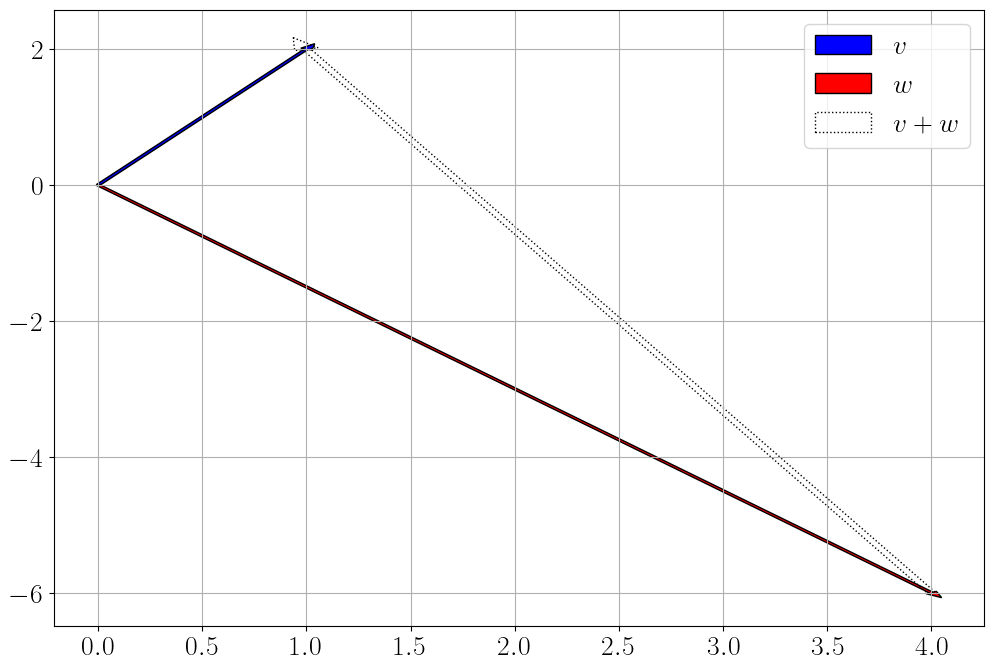

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, v[0], v[1], width = 0.02, fc = 'b', label = r'$v$')
plt.arrow(0, 0, w[0], w[1], width = 0.02, fc = 'r', label = r'$w$')
plt.arrow(w[0], w[1], vMinusW[0], vMinusW[1], width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$v+w$')
plt.legend()
plt.grid()

#### Book Solution

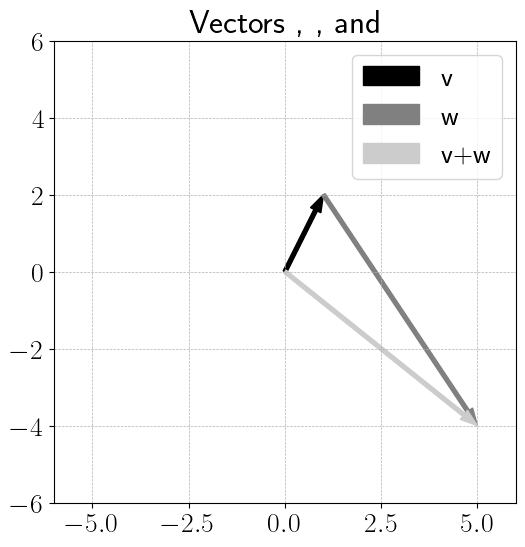

In [33]:
# The vectors
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(v[0],v[1],w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(0,0,vPlusW[0],vPlusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors , , and ')
#plt.savefig('Figure_02_02a.png',dpi=300) # write out the fig to a file
plt.show()

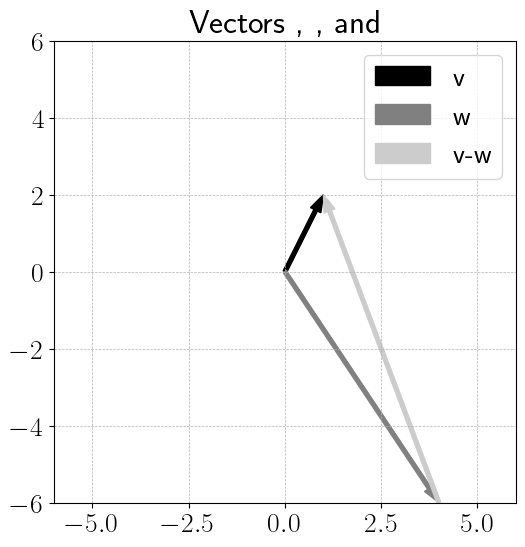

In [34]:
# vector difference
vMinusW = v-w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(0,0,w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(w[0],w[1],vMinusW[0],vMinusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v-w'])
plt.title('Vectors , , and ')
#plt.savefig('Figure_02_02b.png',dpi=300)
plt.show()

### Exercise 2-2

Write an algorithm that computes the norm of a vector by translating Equation 2-7 into code. Confirm, using random vectors with different dimensionalities and orientations, that you get the same result as `np.linalg.norm()`. This exercise is designed to give you more experience with indexing NumPy arrays and translating formulas into code; in practice, it’s often easier to use `np.linalg.norm()`.

The norm of a vector:

$$
\begin{Vmatrix} v \end{Vmatrix} = \sqrt{\sum_{i=1}^n v_i^2}
$$


In [35]:
import math

def norm(v):
    return math.sqrt(sum(map(lambda x: x**2, v)))

In [36]:
v = np.array([1,2,3])
norm(v) == np.linalg.norm(v)

True

In [37]:
v = np.array(
    [
        [1],
        [2],
        [3],
    ]
)
norm(v) == np.linalg.norm(v)

True

In [38]:
import numpy as np

def random_vector():
    n = np.random.randint(1, 10)
    is_col = np.random.choice([True, False])
    vec_array = []
    for i in range(0, n):
        if is_col:
             vec_array.append([i])
        else:
             vec_array.append(i)
    return np.array(vec_array)

#### Book Solution

In [39]:
# the function
def normOfVect(v):
  return np.sqrt(np.sum(v**2))

# test it on a unit-norm vector
w = np.array([0,0,1])
print( normOfVect(w) )

# non-unit-norm vector, and confirm using np.linalg.norm
w = np.array([1,2,3])
print( normOfVect(w),np.linalg.norm(w) )
     

1.0
3.7416573867739413 3.7416573867739413


#### Verification

In [40]:
for _ in range(0, 100000):
    v = random_vector()
    if not norm(v) == np.linalg.norm(v) or not norm(v) == normOfVect(v):
        print(f'{v} failed')
        exit
print('all successfull')

all successfull


#### Exercise 2-3

Create a Python function that will take a vector as input and output a unit vector in the same direction. What happens when you input the zeros vector?

Creating a unit vector:

$$
\hat{v} = \frac{1}{\begin{Vmatrix} v \end{Vmatrix}} v
$$

In [50]:
import numpy as np

def to_unit(v):
    # try to only numpy statements, otherwise there might be precision issues
    #return (1/np.linalg.norm(v))*v
    return v/np.linalg.norm(v)

In [42]:
v

array([0, 1])

In [43]:
to_unit(v)

/tmp/ipykernel_319173/1257345739.py:4: RuntimeWarning: divide by zero encountered in divide
  return (1/np.linalg.norm(v))/v


array([inf,  1.])

#### Book Solution

In [54]:
# define function
def createUnitVector(v):
  # get vector norm
  mu = np.linalg.norm(v)
  # return unit vector
  return v / mu


# test on a unit vector
w = np.array([0,1,0])
print( createUnitVector(w) )

# test on a non-unit vector that is easy to confirm
w = np.array([0,3,0])
print( createUnitVector(w) )

# test on a non-unit vector
w = np.array([13,-5,7])
uw = createUnitVector(w)
print( uw ), print(' ')
# confirm the vectors' norms
print( np.linalg.norm(w),np.linalg.norm(uw) )

# what happens with the zeros vector?
print('\n\n\n') # just some spaces
createUnitVector( np.zeros((4,1)) )

[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]
 
15.588457268119896 0.9999999999999999






/tmp/ipykernel_319173/245972821.py:6: RuntimeWarning: invalid value encountered in divide
  return v / mu


array([[nan],
       [nan],
       [nan],
       [nan]])

#### Verification

In [53]:
for _ in range(0, 100000):
    v = random_vector()
    if not (np.array_equal(to_unit(v), createUnitVector(v), equal_nan=True)):
        raise ValueError(f'{v} failed')
print('all successfull')

/tmp/ipykernel_319173/206699214.py:5: RuntimeWarning: invalid value encountered in divide
  return v/np.linalg.norm(v)
/tmp/ipykernel_319173/245972821.py:6: RuntimeWarning: invalid value encountered in divide
  return v / mu


all successfull


### Exercise 2-4

You know how to create unit vectors; what if you want to create a vector of any arbitrary magnitude? Write a Python function that will take a vector and a desired magnitude as inputs and will return a vector in the same direction but with a magnitude corresponding to the second input.